In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mandelbrot_set(width, height, max_iter=100, zoom=1, x_center=0, y_center=0):
    # Создание комплексной плоскости
    x = np.linspace(x_center - 2.0 / zoom, x_center + 2.0 / zoom, width)
    y = np.linspace(y_center - 2.0 / zoom, y_center + 2.0 / zoom, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros(C.shape, dtype=complex)

    # Итерации для вычисления множества Мандельброта
    img = np.zeros(C.shape, dtype=int)
    for i in range(max_iter):
        mask = np.abs(Z) < 2
        img[mask] = i
        Z[mask] = Z[mask] ** 2 + C[mask]

    return img

def julia_set(width, height, c, max_iter=100, zoom=1, x_center=0, y_center=0):
    # Создание комплексной плоскости
    x = np.linspace(x_center - 1.5 / zoom, x_center + 1.5 / zoom, width)
    y = np.linspace(y_center - 1.5 / zoom, y_center + 1.5 / zoom, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    # Итерации для вычисления множества Жюлиа
    img = np.zeros(Z.shape, dtype=int)
    for i in range(max_iter):
        mask = np.abs(Z) < 2
        img[mask] = i
        Z[mask] = Z[mask] ** 2 + c

    return img

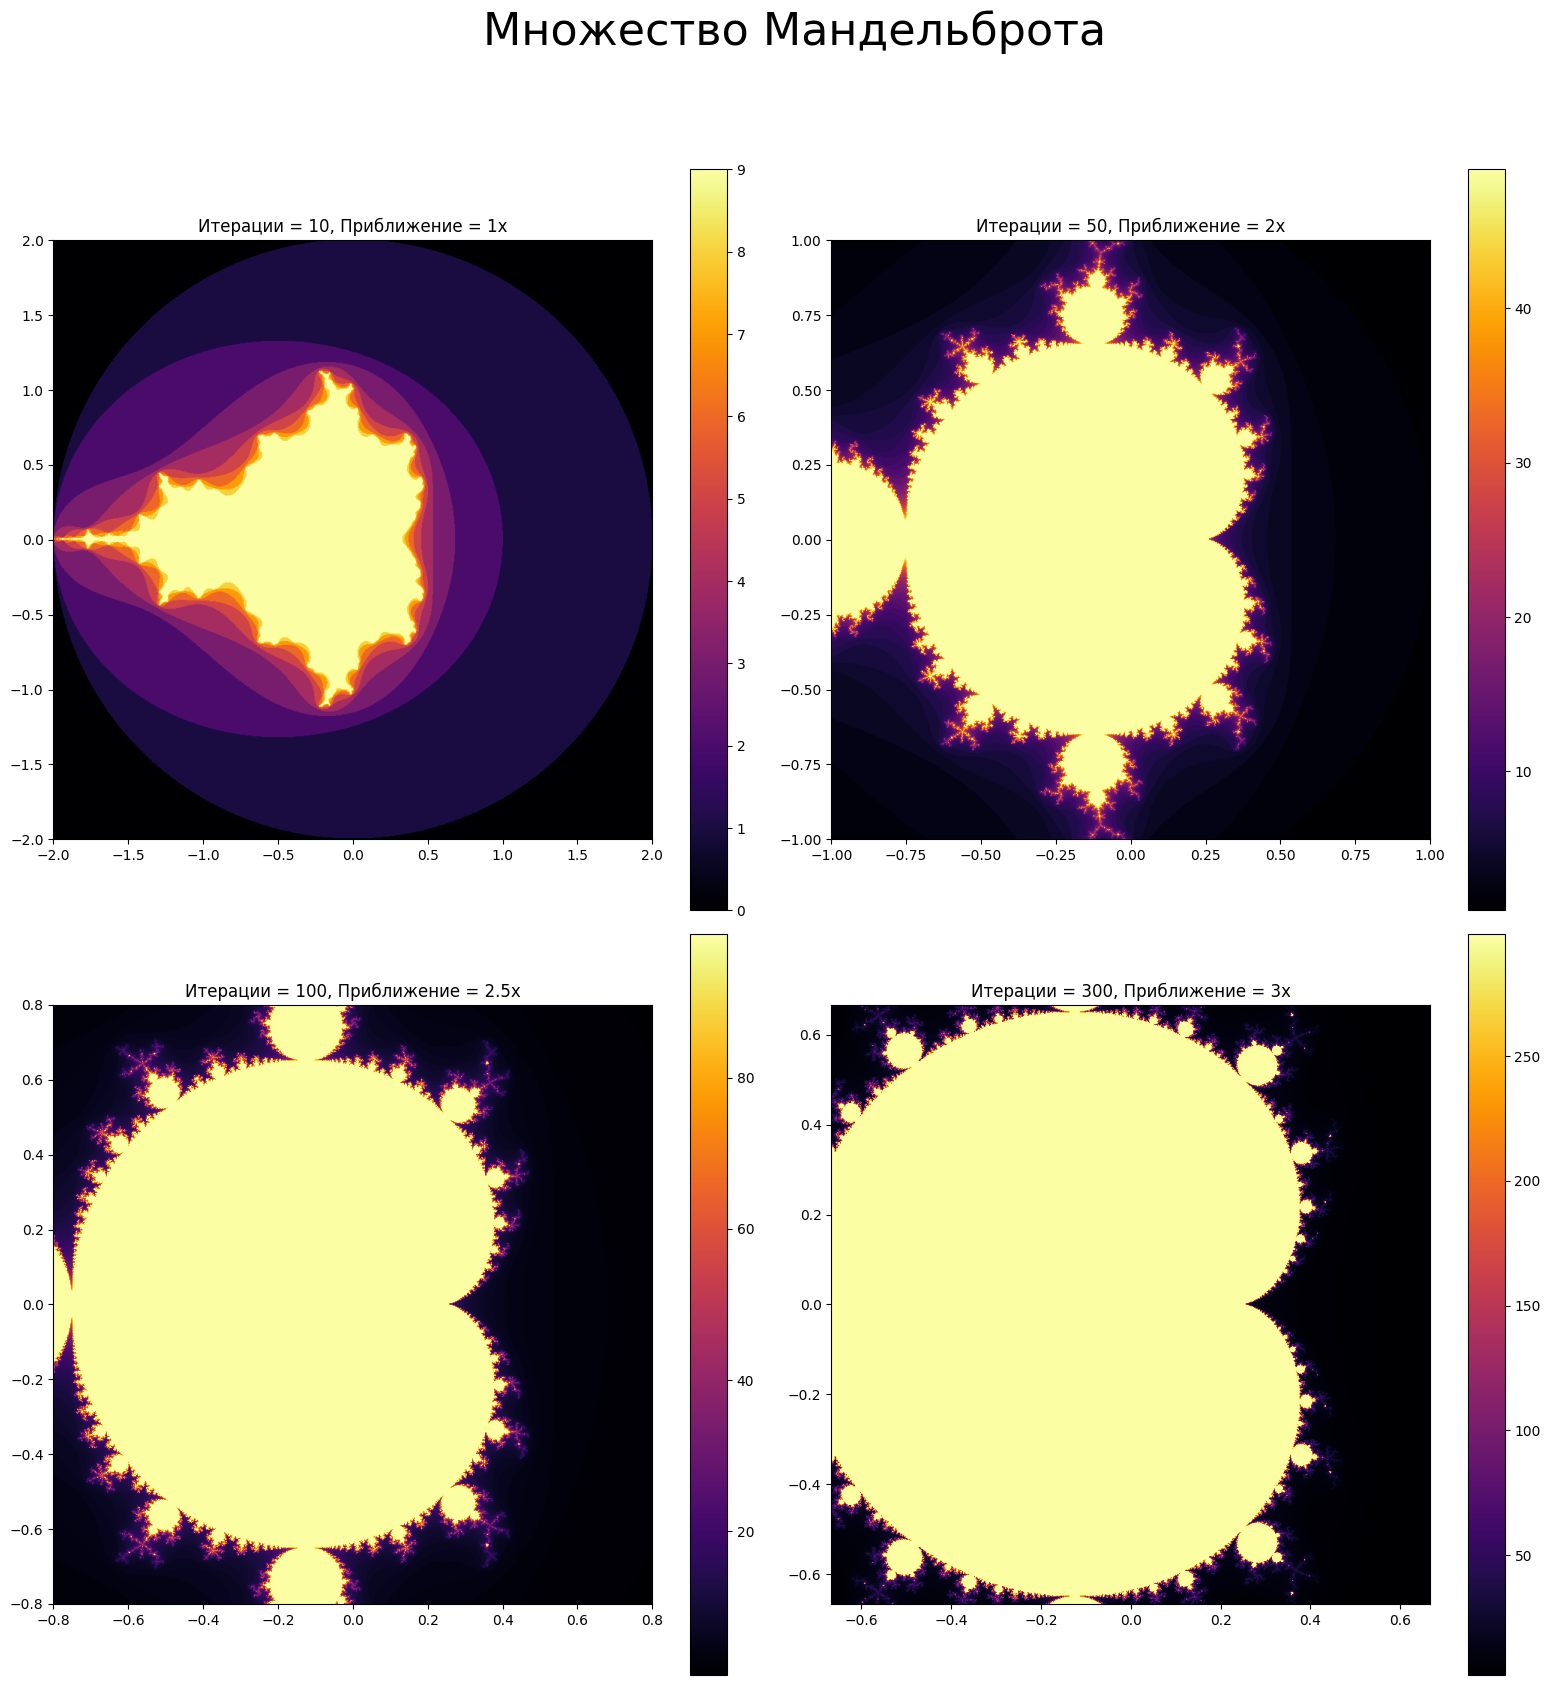

In [5]:
# Параметры визуализации для множества Мандельброта
width, height = 800, 800

# Параметры итераций и масштабирования
iterations_zoom_list = [(10, 1), (50, 2), (100, 2.5), (300, 3)]

plt.figure(figsize=(16, 16))
plt.suptitle('Множество Мандельброта', fontsize=32, y=1.05)
# Генерация изображений при разном числе итераций и приближении


for idx, (max_iter, zoom) in enumerate(iterations_zoom_list):
    plt.subplot(2, 2, idx + 1)
    mandelbrot_img = mandelbrot_set(width, height, max_iter=max_iter, zoom=zoom)
    plt.imshow(mandelbrot_img, cmap='inferno', extent=[-2 / zoom, 2 / zoom, -2 / zoom, 2 / zoom])
    plt.colorbar()
    plt.title(f'Итерации = {max_iter}, Приближение = {zoom}x')

plt.tight_layout()
plt.show()

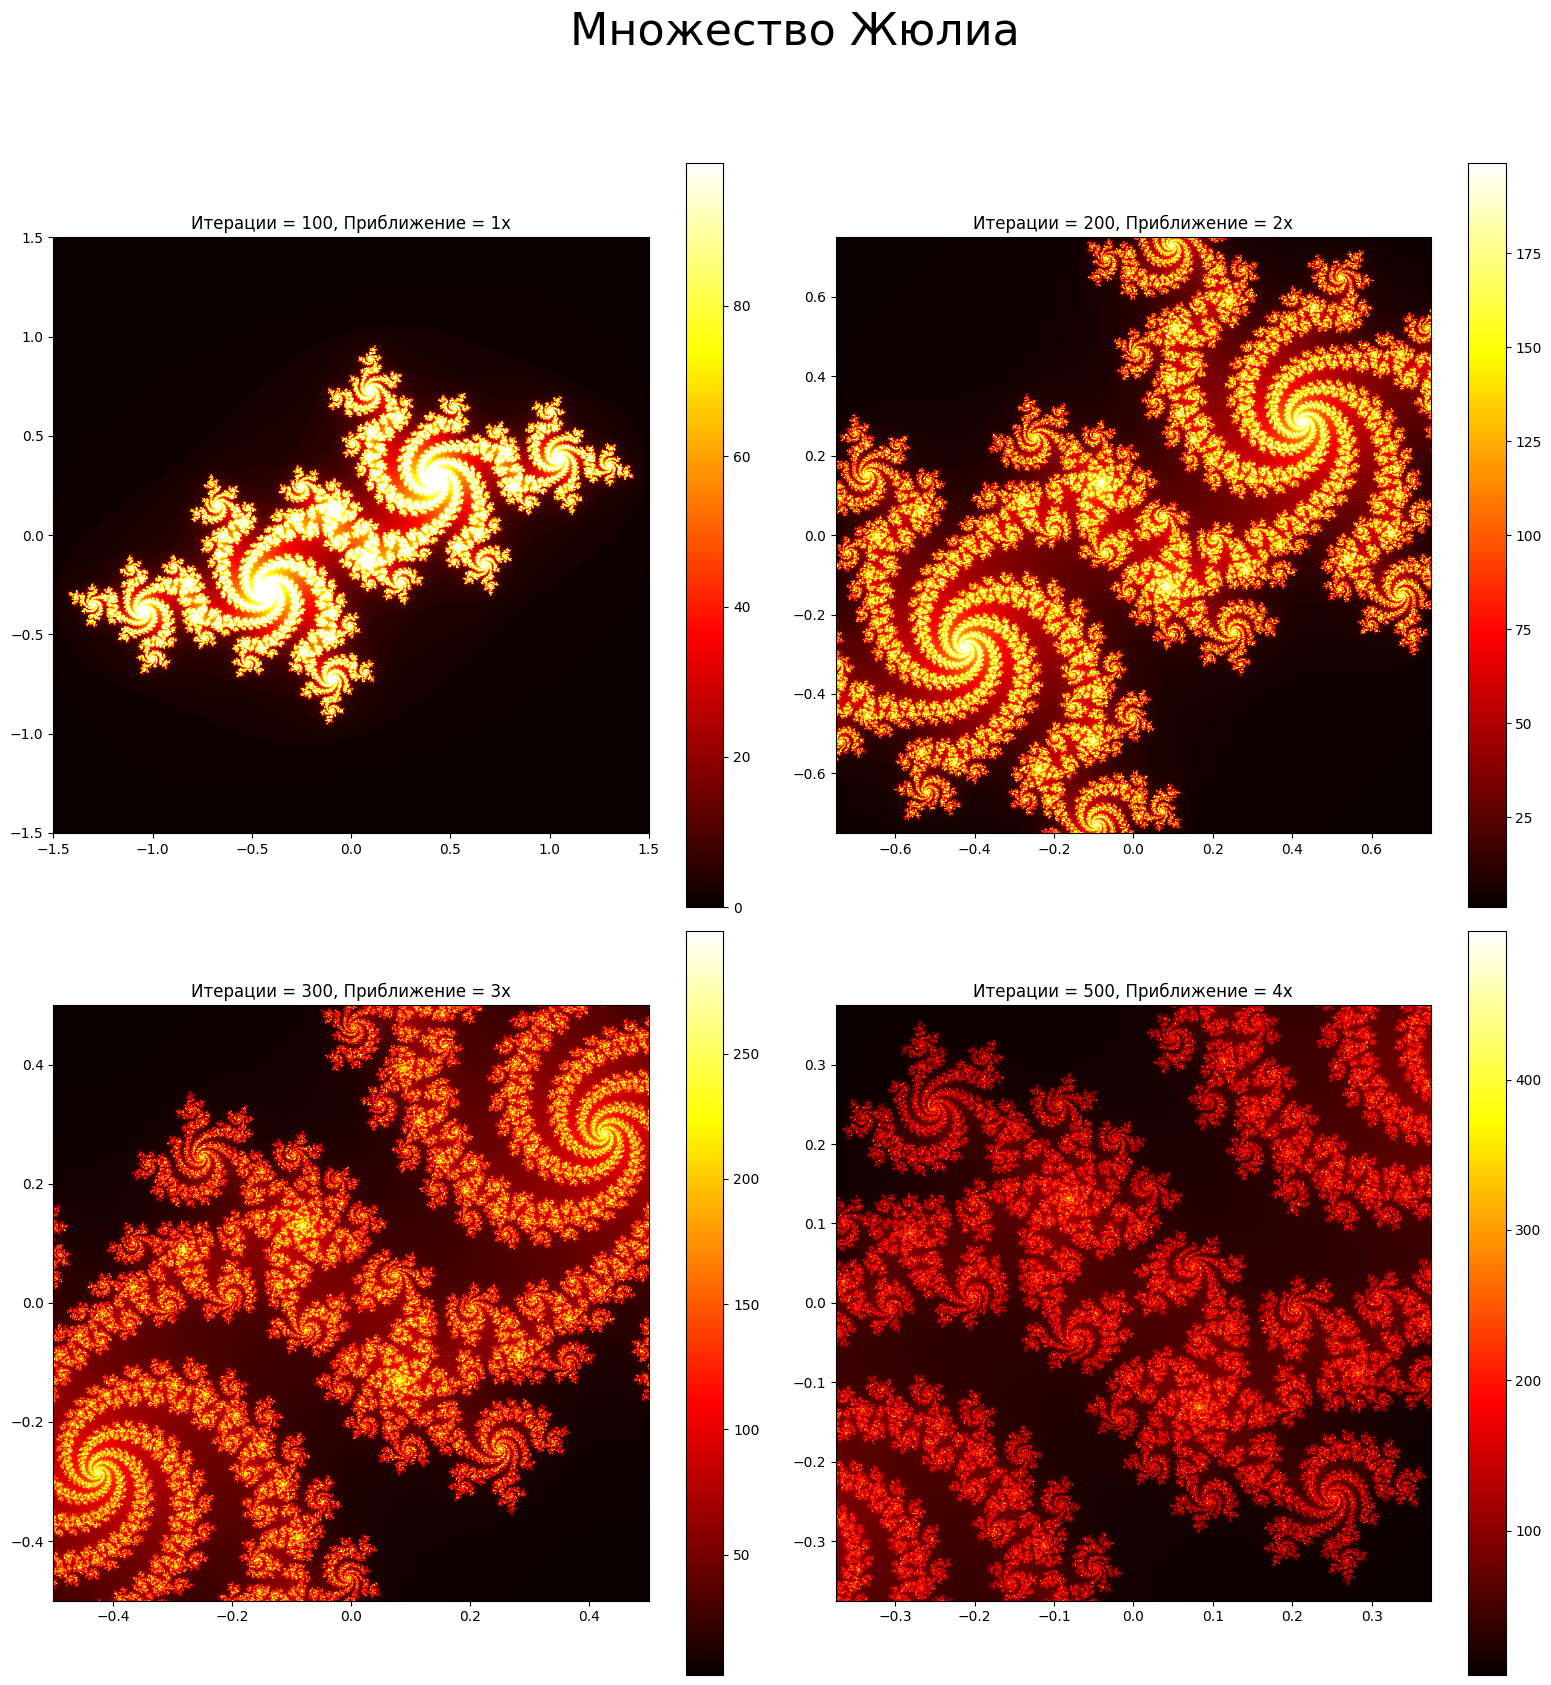

In [4]:
plt.figure(figsize=(16, 16))
plt.suptitle('Множество Жюлиа', fontsize=32, y=1.05)

c = complex(-0.5251993, 0.5251993)  # Пример значения c
iterations_zoom_list = [(100, 1), (200, 2), (300, 3), (500, 4)]


# Генерация изображений множества Жюлиа при разном числе итераций и приближении
for idx, (max_iter, zoom) in enumerate(iterations_zoom_list):
    plt.subplot(2, 2, idx + 1)
    julia_img = julia_set(width, height, c, max_iter=max_iter, zoom=zoom)
    plt.imshow(julia_img, cmap='hot', extent=[-1.5 / zoom, 1.5 / zoom, -1.5 / zoom, 1.5 / zoom])
    plt.colorbar()
    plt.title(f'Итерации = {max_iter}, Приближение = {zoom}x')

plt.tight_layout()
plt.show()